In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 

## Loading the " Telco-Customer-Churn " file into the Python Environment : 

In [2]:
churn_data = pd.read_csv("Telco-Customer-Churn.xlsx - Telco-Customer-Churn.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 

### `Performing some basic Data checks & Identification` :

In [3]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn_data.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7159-FVYPK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [6]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 

### `Next, Shortening the Size of the viewable data to first 5 Rows` :

In [7]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 

# 1) Comparing the Churn count with respect to gender :--

* **Grouping the data by virtue of Gender & Churn count** **:**

In [8]:
churn_data.groupby(["gender","Churn"]).count()

customerID  SeniorCitizen  Partner  Dependents  tenure  \
gender Churn                                                           
Female No           2549           2549     2549        2549    2549   
       Yes           939            939      939         939     939   
Male   No           2625           2625     2625        2625    2625   
       Yes           930            930      930         930     930   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
gender Churn                                                                 
Female No             2549           2549             2549            2549   
       Yes             939            939              939             939   
Male   No             2625           2625             2625            2625   
       Yes             930            930              930             930   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
gender Churn                                                             
Female No             2549              2549         2549         2549   
       Yes             939               939          939          939   
Male   No             2625              2625         2625         2625   
       Yes             930               930          930          930   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
gender Churn                                                               
Female No                2549      2549              2549           2549   
       Yes                939       939               939            939   
Male   No                2625      2625              2625           2625   
       Yes                930       930               930            930   

              MonthlyCharges  TotalCharges  
gender Churn                                
Female No               2549          2549  
       Yes               939           939  
Male   No               2625          2625  
       Yes               930           930

*  **Checking the number of Active & Churned accounts** **:**

In [9]:
churn_data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

> *  We can see that the Company has `lost` a Total of **1869** customers from the overall **7043** Customer sample we had.

In [10]:
#This time Checking the churn count w.r.t their "Gender" :

pd.crosstab(churn_data["gender"],churn_data["Churn"])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


### `Plotting a` __Countplot__ `to show the genderwise` "Churn" `Status of customers:`

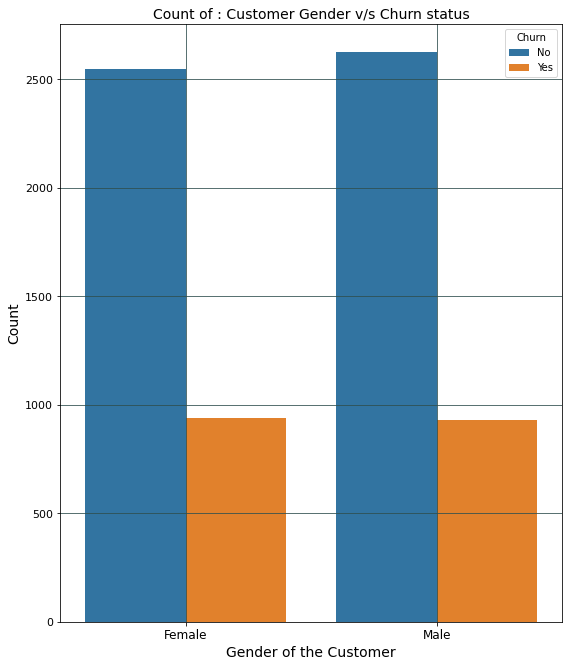

In [11]:
plt.figure(figsize = (9,11))
sns.countplot(x ='gender', hue='Churn', data=churn_data)
plt.title("Count of : Customer Gender v/s Churn status", fontsize = 14)
plt.xlabel("Gender of the Customer",fontsize= 14)
plt.ylabel("Count",fontsize= 14, loc = "center")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 11)
plt.grid(color = "darkslategrey")

> We can say from the above Genderwise stat's and plots that : 
>* `For Females` : **2549** customers `kept` their connection while **939** customers `returned/cancelled` their connections.
>* `For Males`   :  **2625** customers `kept` their connection while **930** customers `returned/cancelled` their connections.

# 

# 2) Finding out how many female senior citizens there in the dataset :--

#### 

### `Grouping and Seperating the Young customers from the Senior citizens w.r.t their genders` :-

In [12]:
churn_data.groupby(["gender","SeniorCitizen"]).count()

customerID  Partner  Dependents  tenure  PhoneService  \
gender SeniorCitizen                                                          
Female 0                    2920     2920        2920    2920          2920   
       1                     568      568         568     568           568   
Male   0                    2981     2981        2981    2981          2981   
       1                     574      574         574     574           574   

                      MultipleLines  InternetService  OnlineSecurity  \
gender SeniorCitizen                                                   
Female 0                       2920             2920            2920   
       1                        568              568             568   
Male   0                       2981             2981            2981   
       1                        574              574             574   

                      OnlineBackup  DeviceProtection  TechSupport  \
gender SeniorCitizen                                                
Female 0                      2920              2920         2920   
       1                       568               568          568   
Male   0                      2981              2981         2981   
       1                       574               574          574   

                      StreamingTV  StreamingMovies  Contract  \
gender SeniorCitizen                                           
Female 0                     2920             2920      2920   
       1                      568              568       568   
Male   0                     2981             2981      2981   
       1                      574              574       574   

                      PaperlessBilling  PaymentMethod  MonthlyCharges  \
gender SeniorCitizen                                                    
Female 0                          2920           2920            2920   
       1                           568            568             568   
Male   0                          2981           2981            2981   
       1                           574            574             574   

                      TotalCharges  Churn  
gender SeniorCitizen                       
Female 0                      2920   2920  
       1                       568    568  
Male   0                      2981   2981  
       1                       574    574

> From this table we can see that of the total **3488** Female customers **:**  
>* **2920** were `Young customers`   &  **568**  were `Senior citizens` .

### `Croping out the Female customers data from the dataset.` **:**


In [13]:
churn1 = churn_data[churn_data["gender"]=="Female"]#, churn_data["SeniorCitizen"]== 1]]
churn1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


 > We can see that there **3488 Females** in our sample dataset.

### `Plotting a Count Graph for Various Types of Female Customers based on their age` : 

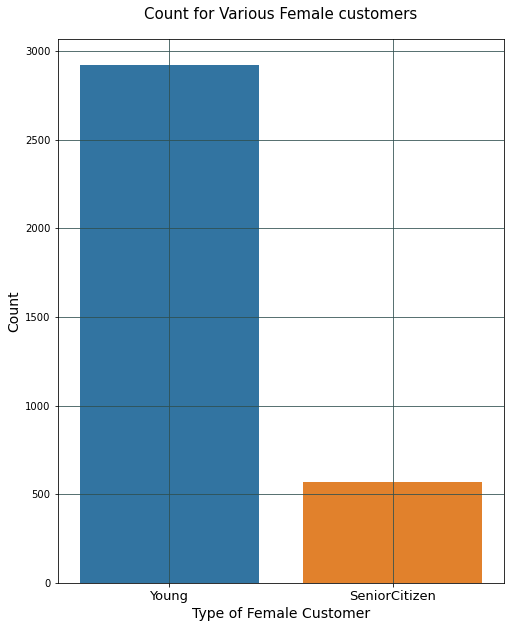

In [14]:
plt.figure(figsize = (8,10))
sns.countplot(x ='SeniorCitizen', data=churn1)
plt.title("Count for Various Female customers", fontsize = 15, pad=20)
plt.xlabel("Type of Female Customer",fontsize= 14)
plt.ylabel("Count",fontsize= 14)
plt.xticks([0,1],["Young","SeniorCitizen"],fontsize= 13)
plt.yticks()
plt.grid(color = "darkslategrey")

In [15]:
churn1a = churn1["SeniorCitizen"].value_counts()

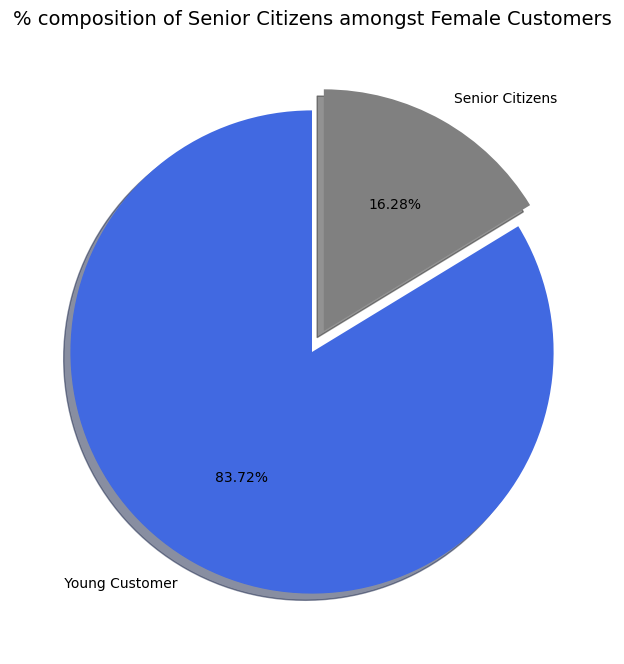

In [16]:
# Declaring some Variables beforehand :

labels = [" Young Customer ", "Senior Citizens"]
colors = ["royalblue", "grey"]
explode = (0,0.1)

# Plotting the Pie-Chart :

plt.figure(figsize=(10,8), dpi= 100)
plt.pie(churn1a, labels=labels, colors=colors , startangle=90, autopct='%1.2f%%',shadow=True,explode=explode )
plt.title("% composition of Senior Citizens amongst Female Customers", fontsize = 14, pad = 18)
plt.ylabel("")
plt.show()

#### > From the above plots,  we can see that of the total **3488** Female customers **:**  



> * `83.73%` or **2920** were `Younger customers`   & `16.28%` or **568**  were `Senior citizens` .

#### 

##### 

 **Before proceeding further ,We convert the DType of**`"Total Charges" `**Column from `Object` to `Float`** **:**

In [17]:
churn_data["TotalCharges"]= pd.to_numeric(churn_data["TotalCharges"],downcast="float", errors='coerce')

In [18]:
churn_data["TotalCharges"].fillna(churn_data["TotalCharges"].mean(),inplace = True)

In [19]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 

# 3) Comparing the 'tenure' with 'Total Charges' :--

#### 

### > Plotting a Correlation plot of the Total Charges vis-à-vis other NUMERICAL Labels :

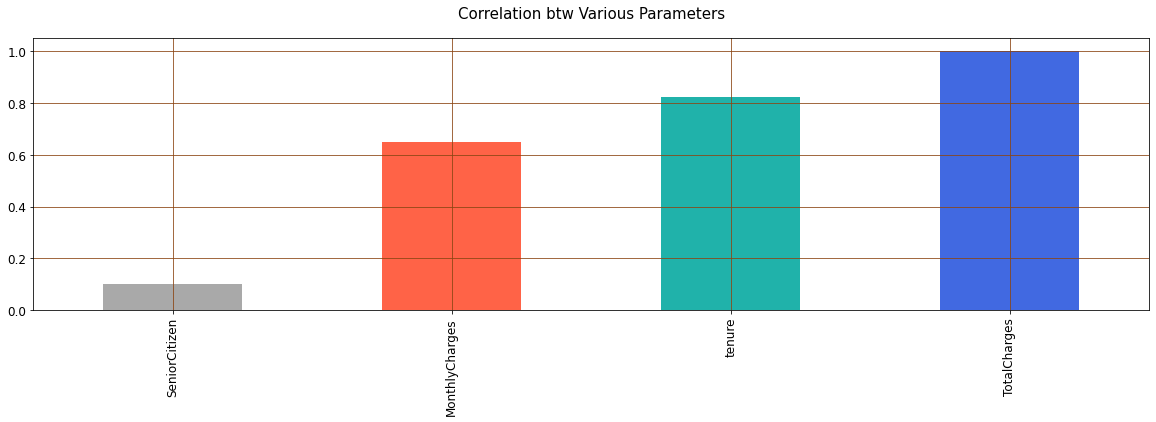

In [20]:
plt.figure(figsize = (17,12))
churn_data.corr()["TotalCharges"].sort_values().plot(kind = "bar",figsize= (20,5), color = ["darkgrey","tomato", "lightseagreen","royalblue"])
plt.title("Correlation btw Various Parameters", fontsize = 15, pad = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(color = "saddlebrown")
plt.show()

### From the above, we can see that:
>The `Total Charges` and `Tenure` of the customers have a High Correlation.

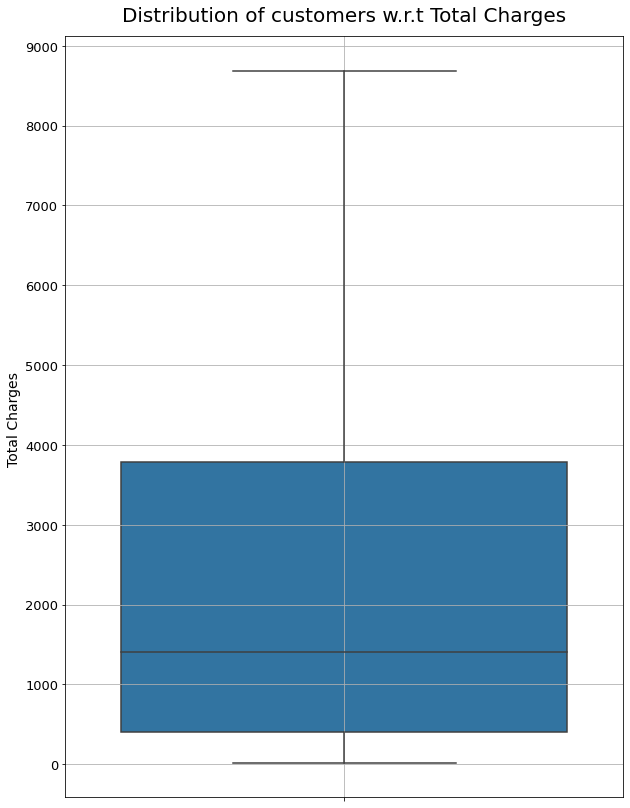

In [21]:
y_ticks = np.arange(0,9500,1000) # Setting range for y-axis

plt.figure(figsize = (10,14))
sns.boxplot( y= "TotalCharges", data = churn_data,)
plt.title("Distribution of customers w.r.t Total Charges", fontsize = 20, pad = 15)
plt.ylabel("Total Charges ",  fontsize = 14)
plt.xticks(fontsize= 13)
plt.yticks(y_ticks,fontsize = 13)
plt.grid()
plt.show()

### > From the above we can say that :
> * The `majority` of the customers are paying in the range of `400` to `3800` as their Total charges.
> * So,the customers `on an average` are paying **1400** as their overall charges.

#### 

<Figure size 1440x1440 with 0 Axes>

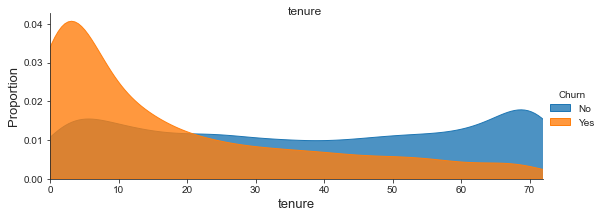

<Figure size 1440x1440 with 0 Axes>

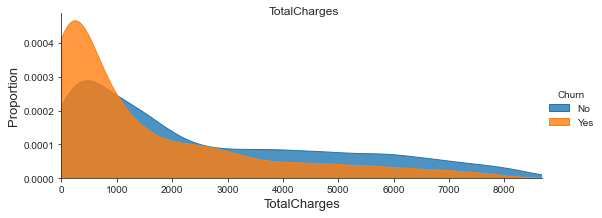

In [41]:
def distribution_plot(telco_data):
    plt.figure(figsize=(20,20))
    sns.set_style("ticks")
    s=sns.FacetGrid(churn_data,hue="Churn", aspect=2.5) ##,palette={1:'Lightblue',0:'gold'})
    s.map(sns.kdeplot,telco_data,shade=True,alpha=0.8)
    s.set(xlim=(0,churn_data[telco_data].max()))
    s.add_legend()
    s.set_axis_labels(telco_data,'Proportion', fontsize = 13)
    s.fig.suptitle(telco_data)
    plt.show()
    
distribution_plot("tenure") ##Number of months the customer has stayed with the company
distribution_plot("TotalCharges") ##The total amount charged to the customer

### >  Plotting a Stripplot for showing the Relation between Tenure and Total charges

<function matplotlib.pyplot.show(close=None, block=None)>

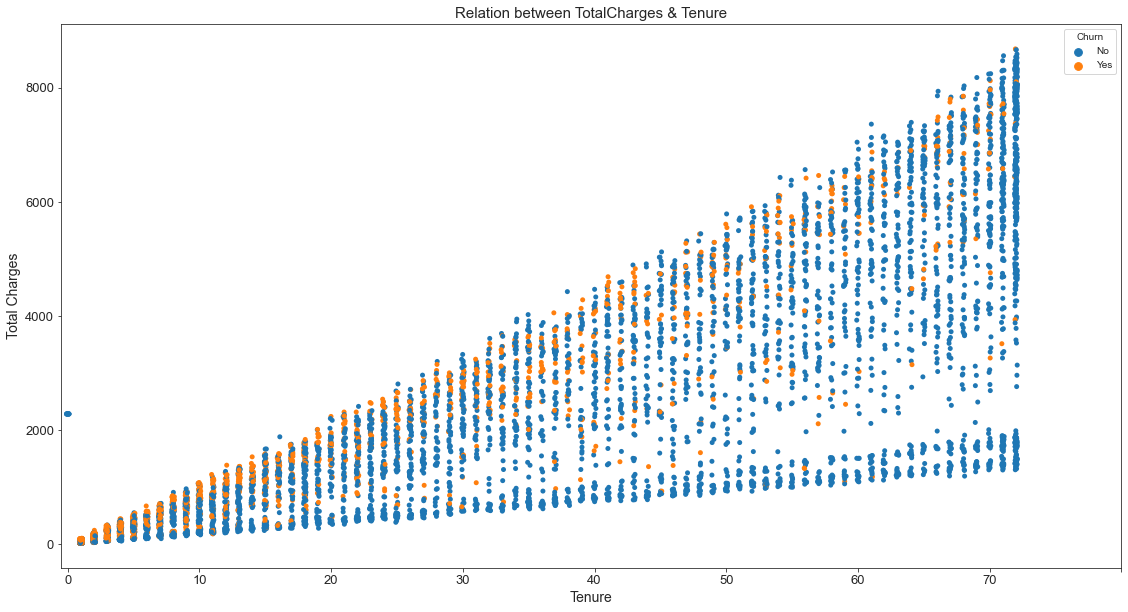

In [23]:
x_ticks = np.arange(0,90,10)

plt.figure(figsize = (19,10))
sns.stripplot(x= "tenure", y = "TotalCharges", hue = "Churn", data = churn_data)
plt.title("Relation between TotalCharges & Tenure", fontsize = 15)
plt.xlabel("Tenure", fontsize= 14)
plt.ylabel("Total Charges", fontsize= 14)
plt.xticks(x_ticks, fontsize= 13)
plt.yticks(fontsize = 13)
plt.show

## > Looking at the above plots made between the `TotalCharges vis-a-vis the Tenure` of the customer we can say that :

>> * As the `Tenure` of the customer with the Telco **increases**, their overall charges also **increases**. 

>> * However ,the probability of the Customer `NOT terminating` their services with Telco **decreases** as their stay with Telco **increases**.
    >> * The chances of the Long-term/Loyal customer's discontinuing their services with Telco is `very low`.

>> * Telco has a `higher` churn rate for the newer customers in Tenure range of `0 - 10` months. 

# 

#### 

# 4) Finding out which type of "Contract" is preffered by the senior citizens  :-- 

#### 

###  `Slicing out the data on Senior Citizens from the given dataset.` **:**

In [24]:
sc_data = churn_data[churn_data["SeniorCitizen"]== 1 ]
sc_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.650002,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.950195,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.649994,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.250000,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.750000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.399902,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.049988,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.100098,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.750000,Yes


In [25]:
sc_data["Contract"].value_counts()

Month-to-month    807
One year          190
Two year          145
Name: Contract, dtype: int64

> * From the above we can see that there is a total of `1142 Senior Citizens` & there're `3 types of Contract` available to them. 
> * The 3 contract types are **Month-to-month** , **One year** & **Two year** contracts.

## Multiple Visualisations are possible for showing the customers preferred contract types.
### > **Here we'll be using the following 2 methods :**
>* `Stripplot`
>* `Piechart`

## 1) `Stripplot` **:**

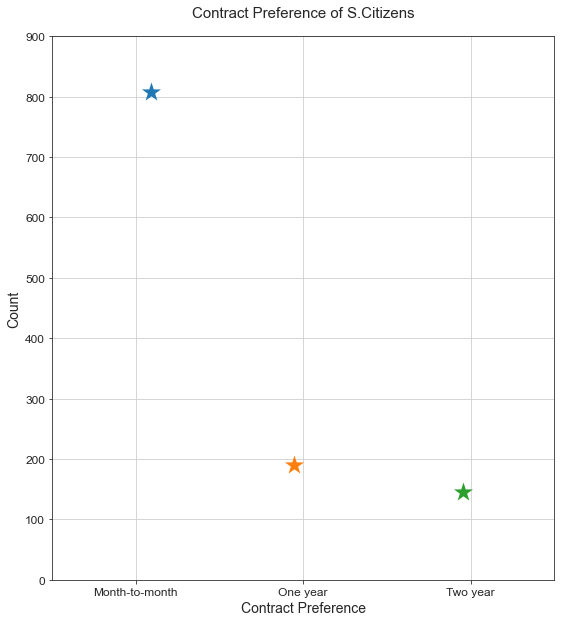

In [26]:
#Pre-defining the range's of y-axis: 

y_ticks = np.arange(0,1000,100)

# Plotting the graph :

plt.figure(figsize=(9,10))
sns.stripplot(y= sc_data["Contract"].value_counts(),x = churn_data["Contract"].sort_values().unique(), data=sc_data,size=20,marker = "*")
plt.title("Contract Preference of S.Citizens", fontsize = 15 , pad= 19)
plt.xlabel("Contract Preference",fontsize= 14)
plt.ylabel("Count",fontsize= 14)
plt.xticks(fontsize = 12)
plt.yticks(y_ticks,fontsize = 12)
plt.grid()
plt.show()

## 2) `PieChart` **:**

### Grouping the Senior citizens data (i.e. sc_data) gathered previously by their prefered contract.

In [27]:
sc_data1 = sc_data.groupby(["Contract","SeniorCitizen"]).size()
sc_data1

Contract        SeniorCitizen
Month-to-month  1                807
One year        1                190
Two year        1                145
dtype: int64

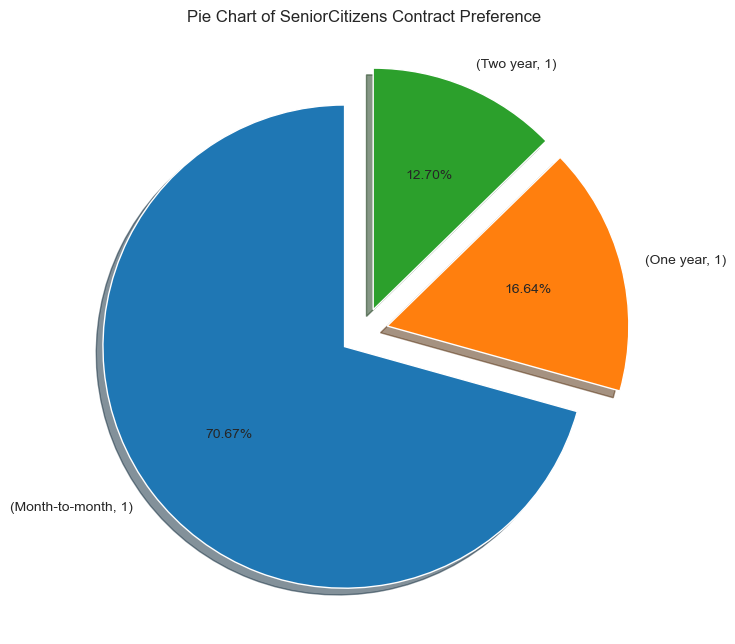

In [28]:
plt.figure(figsize=(10,8), dpi= 100)
sc_data1.plot(kind='pie', subplots=True, autopct='%1.2f%%',startangle=90, shadow = True, explode = (0.1,0.1,0.1))
plt.title("Pie Chart of SeniorCitizens Contract Preference")
plt.ylabel("")
plt.show()

#### 

## > Insights attained from the above Data & Visualization's : 
> We can overall say that :
> * A **Majority**  of Senior citizens prefered the **Month-to-month** contract i.e. `70.67` % or `807` of 1142 samples.

> * Followed by the **One Year** contract which was prefered by : `16.64` % or `190` of 1142 samples.

> * The Least popular contract term was the **Two year** contract which was prefered by just : `12.70` % or `145` of 1142 samples.


#### 

#### 

# 5) Insights & Visualisations regarding the Payment Method's :-

#### 

#### 

In [29]:
# Slicing the data to get desired data on Payment Methods :

total_pm_data = churn_data["PaymentMethod"].value_counts()
total_pm_data

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

#### 

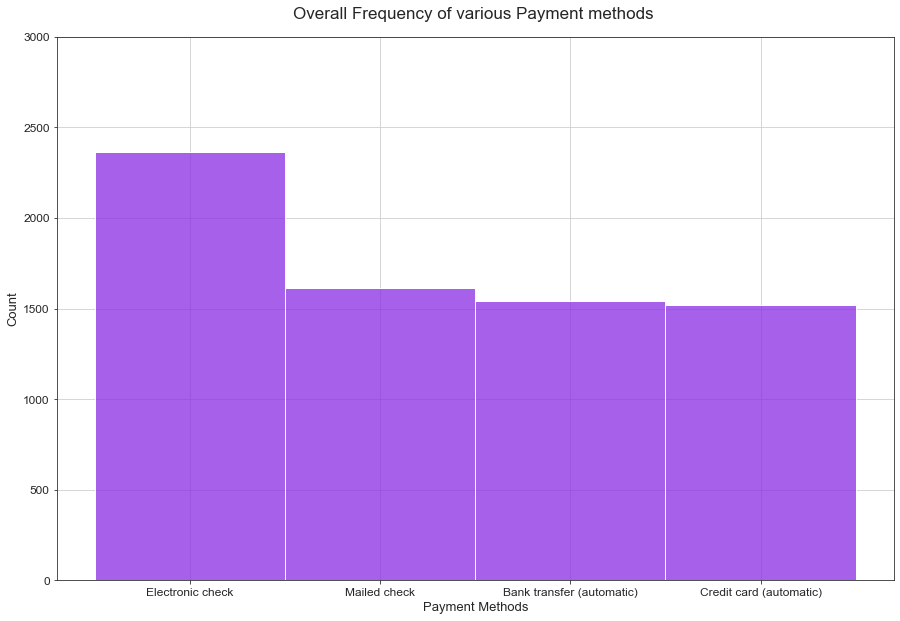

In [30]:
plt.figure(figsize=(15,10))
y_ticks = np.arange(0,3500,500)
sns.histplot(x = 'PaymentMethod', data = churn_data,color= "blueviolet" ,  )
plt.title("Overall Frequency of various Payment methods ", fontsize = 17, pad= 18)
plt.xlabel("Payment Methods", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 12)
plt.yticks(y_ticks, fontsize = 12)
plt.grid()
plt.show()

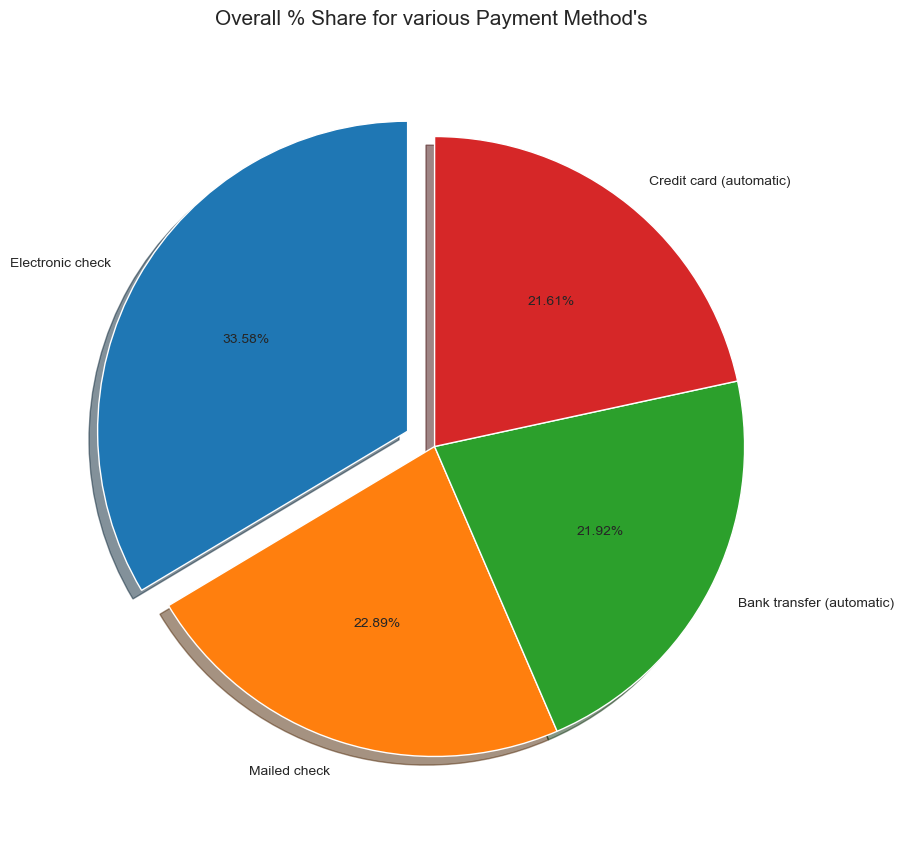

In [31]:
plt.figure(figsize=(10,12), dpi= 100)
total_pm_data.plot(kind='pie', subplots=True,autopct='%1.2f%%',startangle=90, shadow = True, explode=(0.1,0,0,0))
plt.title("Overall % Share for various Payment Method's ",fontsize = 15, pad= 25)
plt.ylabel("")
plt.show()

## > Insights attained from the above visualizations : 
> We can overall say that :
> * A **Majority**  of customers prefered the **Electronic check** i.e. `33.58` % or `2365` of 7043 samples.

> * **Mailed check** was prefered by              : `22.89` % or `1612` of 7043 samples.

> * **Bank transfer (automatic)** was prefered by : `21.92` % or `1544` of 7043 samples.

> * **Credit card (automatic)** was prefered by   : `21.61` % or `1522` of of 7043 samples.

#### 

In [32]:
pm_data = churn_data.groupby(["gender","PaymentMethod"]).size()
pm_data

gender  PaymentMethod            
Female  Bank transfer (automatic)     788
        Credit card (automatic)       752
        Electronic check             1170
        Mailed check                  778
Male    Bank transfer (automatic)     756
        Credit card (automatic)       770
        Electronic check             1195
        Mailed check                  834
dtype: int64

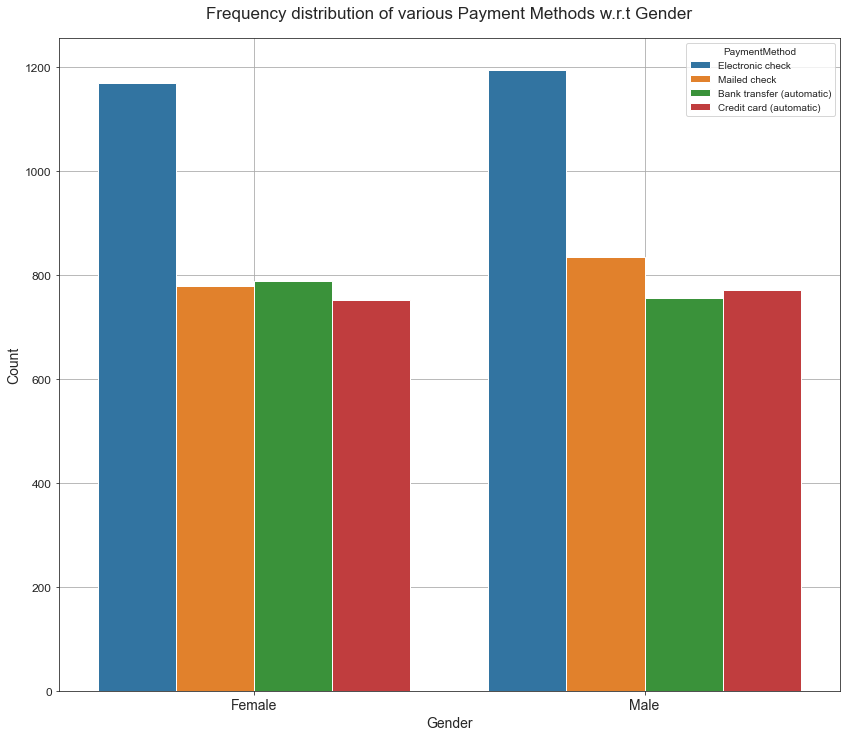

In [33]:
plt.figure(figsize= (14,12))
sns.countplot(x = "gender", hue = "PaymentMethod", data = churn_data)
plt.title("Frequency distribution of various Payment Methods w.r.t Gender", fontsize = 17, pad = 20)
plt.xlabel("Gender", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12)
plt.grid(color = "darkgrey")
plt.show()

### `The Pie chart below shows us the % share of various Payment methods from the above` :

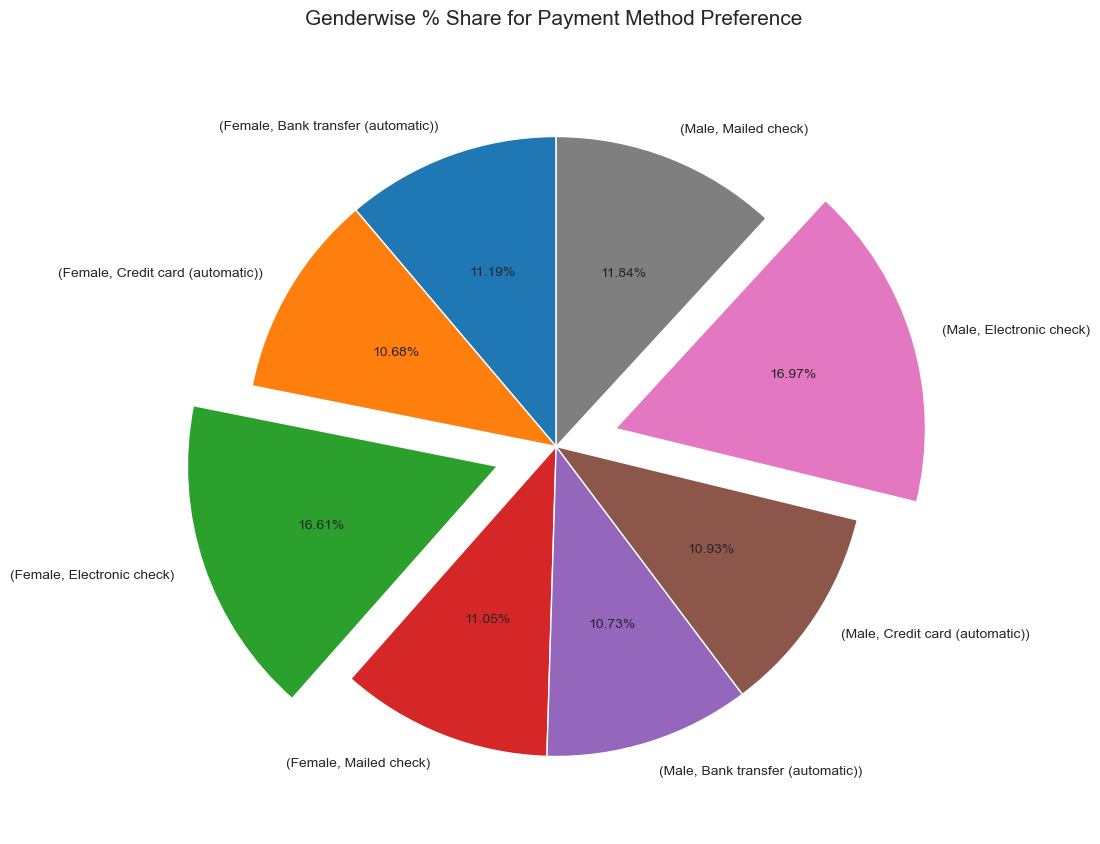

In [34]:
plt.figure(figsize=(10,12), dpi= 100)
pm_data.plot(kind='pie', subplots=True,autopct='%1.2f%%',startangle=90,explode=(0, 0, 0.2, 0,0,0,0.2,0))
plt.title("Genderwise % Share for Payment Method Preference ",fontsize = 15, pad= 25)
plt.ylabel("")
plt.show()

#### 

### > **Insights** from Above Visualizations :--
> * Amongst the **Females** :
>> * Most of the Ladies i.e. `16.61 %` ( or **1170** ) prefer to pay via `Electronic check`,,
>> * `10.68 %` ( or **752** ) Females prefer `Automatic Credit card transaction`,
>> * `11.19 %` ( or **788** ) Females prefer `Automatic Bank Transfers` 
>> * `11.05 %` ( or **778** ) Females prefer to pay via `Mailed check`.
> * Amongst the **Males** :
>> * Similar to their female counterparts, most of the Men i.e. `16.97 %` ( or **1195** ) prefer to pay via `Electronic check`,
>> * `10.93 %` ( or **770** ) Males prefer `Automatic Credit card transaction`,
>> * `10.73 %` ( or **756** ) Males prefer `Automatic Bank Transfers`,
>> * `11.84 %` ( or **834** ) Males prefer to pay via `Mailed check`.

#### 

## 5.A) For finding the prefered Payment Methods of " Senior " citizens : -

#### 

In [35]:
# Getting/Slicing the desired data from the given dataset.

sc_pm_data = churn_data.groupby(["PaymentMethod","gender","SeniorCitizen"]).size()

In [36]:
sc_pm_data1 = sc_data.groupby(["PaymentMethod", "SeniorCitizen"]).size()
sc_pm_data1

PaymentMethod              SeniorCitizen
Bank transfer (automatic)  1                233
Credit card (automatic)    1                221
Electronic check           1                594
Mailed check               1                 94
dtype: int64

#### 

### Below PieChart shows us what share of Senior Citizens prefer various payment methods :

###### 

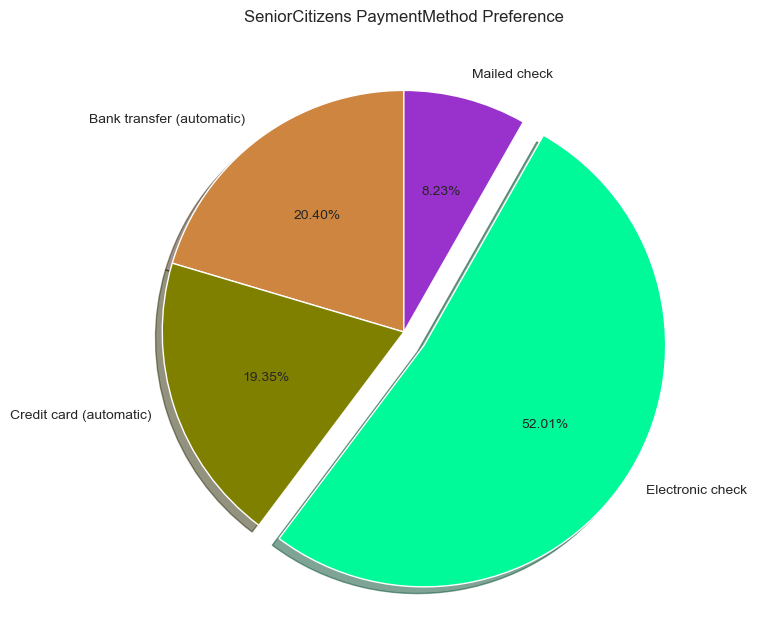

In [37]:
labels =  ["Bank transfer (automatic)", "Credit card (automatic)", "Electronic check", "Mailed check" ]
colors = ["peru","olive", "mediumspringgreen" , "darkorchid"]
plt.figure(figsize=(8,8), dpi= 100)
plt.pie(sc_pm_data1, labels=labels, colors=colors , startangle=90, autopct='%1.2f%%',shadow=True,explode=(0, 0, 0.1, 0) )
plt.title("SeniorCitizens PaymentMethod Preference")
plt.ylabel("")
plt.show()

### > **Insights** from Above Visualizations :--
> * We can conclude tthat amongst the **Senior Citizens** :

>> * A **Majority** or `52.01 %` ( or **594** ) of Senior citizens opt to pay via an `Electronic check` ,

>> * Followed by `20.40 %` ( or **233** ) Senior citizens who prefer `Automatic Bank Transfers` &,

>> * `19.35 %` ( or **221** ) Senior citizens who prefer to pay via `Automatic Credit card transaction`,

>> * The **Least** popular payment method amongst the Senior citizens is paying via `Mailed check`. It's prefered only by `8.23%` ( or **94** ) of Senior citizens.

#### 

## 5.B) For finding the prefered Payment Methods of " Younger " people : -

#### 

In [38]:
#Extracting the data on younger people :

youth_data = churn_data[churn_data["SeniorCitizen"]== 0 ]
youth_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.400024,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.500000,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.899902,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.450012,No


In [39]:
youth_data1 = youth_data.groupby("PaymentMethod").size()
youth_data1

PaymentMethod
Bank transfer (automatic)    1311
Credit card (automatic)      1301
Electronic check             1771
Mailed check                 1518
dtype: int64

### `Plotting a Pie-Chart for the above Data` : 

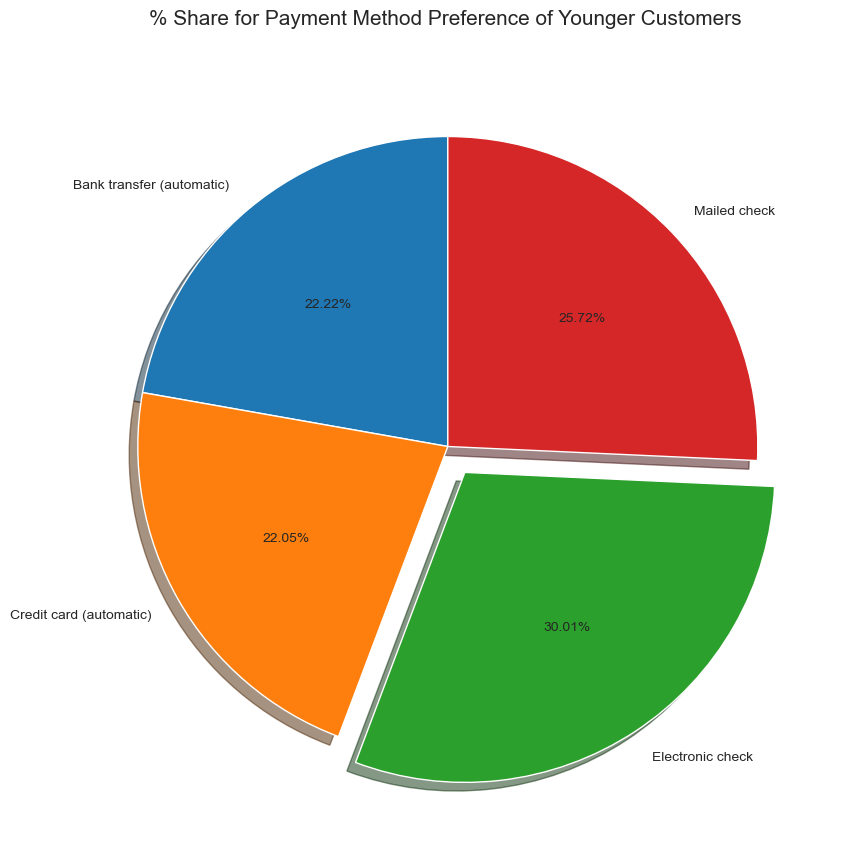

In [40]:
plt.figure(figsize=(10,12), dpi= 100)
youth_data1.plot(kind='pie', subplots=True,autopct='%1.2f%%',startangle=90,explode=(0, 0, 0.1, 0), shadow = True)
plt.title("% Share for Payment Method Preference of Younger Customers ",fontsize = 15, pad= 25)
plt.ylabel("")
plt.show()

### > **Insights** from Above Visualizations :--
> * We can conclude that amongst the **Younger generation** :

>> * A **Majority** or `30.01 %` ( or **1771** ) of Younger people prefer to pay via an `Electronic check` ,

>> * Followed by `25.72 %` ( or **1518** ) of Younger people who prefer paying via `Mailed check` ,

>> * People who prefer to pay via `Automatic Bank Transfer` and  `Automatic Credit card transaction` are almost equal i.e. at `22.22%` & `22.05%` respectively.
